In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
datasetname='2nd-CuSn-MFF-FE-HCOOHCO.csv'
strlist = datasetname.split('.') 
savename=strlist[0]
dataset = pd.read_csv(datasetname)
print(dataset.head())
col = dataset.columns.values.tolist()
headers =col[0:-1]
features = np.array(dataset[headers])
labels = dataset['FEHCOOH/CO']

   CCN  C=O  CCC  CCC[C@@H](C)N  CO  C[C@H](N)C(=O)O  CN  CCCCN  CC(=O)O  \
0    3    1    4              1   1                1   2      2        1   
1    2    2    3              1   2                1   1      1        2   
2    0    0    0              0   0                0   0      0        0   
3    3    1    3              1   1                1   4      2        1   
4    0    2    0              0   2                0   0      0        0   

   CC[C@H](N)C(=O)O  ...  cc(C)nc(c)C  cc(C)n  ccc(nc)-c(c)n  cc(c)OC  \
0                 1  ...            0       0              0        0   
1                 1  ...            0       0              0        0   
2                 0  ...            0       0              0        0   
3                 1  ...            0       0              0        0   
4                 0  ...            0       0              0        0   

   ccc(cc)OC  COc  cc(O)ccn  Cc  cnc[nH]c  FEHCOOH/CO  
0          0    0         0   0         0       

In [2]:
plot_tree_name_1='DecisionTree of '+str(savename)
plot_tree_name_2= 'Feature importance of Decision Tree model in '+str(savename)+'.png'
plot_tree_name_3= 'Confusion Matrix of Decision Tree model in '+str(savename)+'.png'
plot_tree_name_4= 'ROC curve of Decision Tree model in '+str(savename)+'.png'
plot_tree_name_5= 'Feature importance2 of Decision Tree model in '+str(savename)+'.png'

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
X=features
y=labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15, random_state=19)

# TRAIN_TEST_SPLIT=0.85
# point = round(X.shape[0]*TRAIN_TEST_SPLIT)
# permutation = np.random.permutation(y.shape[0])
# X_train = X[permutation[:point], :]
# y_train = y[permutation[:point]]
# X_test = X[permutation[point:], :]
# y_test = y[permutation[point:]]
cv = StratifiedShuffleSplit(n_splits=50, test_size=0.15, random_state=4)

In [4]:
# 搭建决策树
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import joblib
tuned_parameters = [{'min_impurity_decrease': [0.01, 0.03, 0.04], 'max_depth': [3,  5, 7], 
                     'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': [3,5,7, 9], 'class_weight': ['balanced'], 
                      'min_samples_split': [3,4,5]}]
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, tuned_parameters, verbose=1, scoring=None, cv=cv, n_jobs=16)
clf.fit(X_train, y_train)
clf_new = clf.best_estimator_
best_p = clf.best_params_
paras = clf_new.get_params()
print(best_p)
acc_unique = clf_new.score(X_test, y_test)
print('Current accuracy:', acc_unique)

Fitting 50 folds for each of 216 candidates, totalling 10800 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done 464 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 4144 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done 9744 tasks      | elapsed:   10.4s


{'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.01, 'min_samples_split': 3}
Current accuracy: 0.5714285714285714


[Parallel(n_jobs=16)]: Done 10800 out of 10800 | elapsed:   11.0s finished


In [5]:
clf=clf.best_estimator_

feature_name: CCC importance:  0.5815751795460593
feature_name: cccnc importance:  0.41842482045394064
feature_name: cc[nH]cc importance:  0.0
feature_name: C=NC importance:  0.0
feature_name: cC(=O)[O-] importance:  0.0
feature_name: C[O-] importance:  0.0


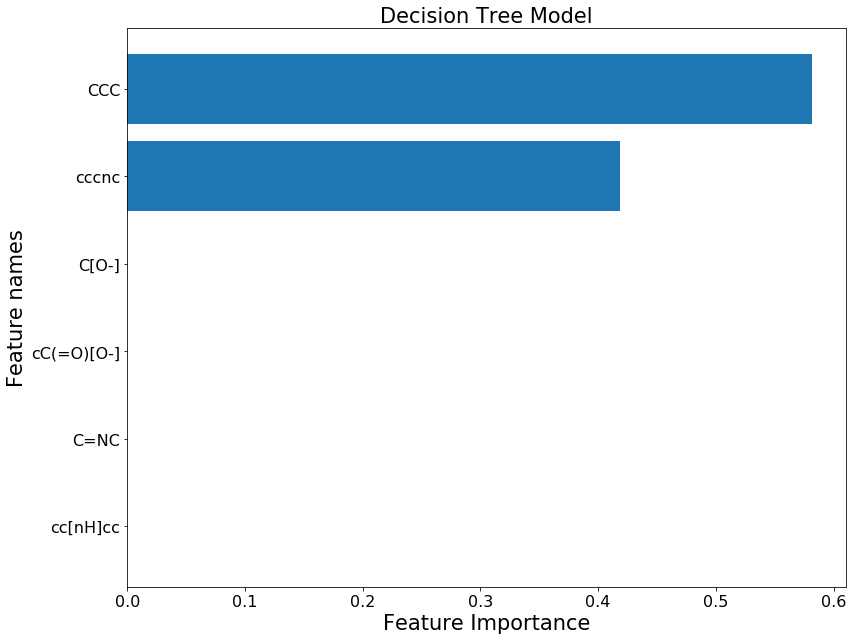

In [6]:
title=headers
p = np.argsort(-clf.feature_importances_)
feat=[]
importance=[]
for i in range(6):
    print('feature_name:', title[p[i]], 'importance: ', clf.feature_importances_[p[i]])
    feat.append(title[p[i]])
    importance.append(clf.feature_importances_[p[i]])
feat=np.array(feat)
importance=np.array(importance)
# Plot the feature importances of the forest
tree_feature_importances = importance
sorted_idx = tree_feature_importances.argsort()
y_ticks = np.arange(0, len(feat))

#设置输出的图片大小
figsize = 12,9
fig, ax = plt.subplots(figsize=figsize)

ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feat[sorted_idx])
ax.set_yticks(y_ticks)
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax.set_xlabel('Feature Importance',font1)
ax.set_ylabel('Feature names',font1)
ax.set_title("Decision Tree Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=16)
fig.tight_layout()
plt.savefig(plot_tree_name_2, bbox_inches='tight',dpi=600)
plt.show()

In [7]:
feature_numbers=5
idx_third = clf.feature_importances_.argsort()[-feature_numbers]
threshold = clf.feature_importances_[idx_third] + 0.001
idx_features = (-clf.feature_importances_).argsort()[:feature_numbers]
name_features = np.array(headers)[idx_features]
print('Selected features: {}'.format(name_features))
X_transform=dataset[name_features]

Selected features: ['CCC' 'cccnc' 'cc[nH]cc' 'C=NC' 'cC(=O)[O-]']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, labels, test_size=0.15, random_state=19)
tuned_parameters = [{'min_impurity_decrease': [0.01, 0.03, 0.04], 'max_depth': [3,  5, 7], 
                     'max_features': ['sqrt', 'log2'], 'max_leaf_nodes': [3,5,7, 9], 'class_weight': ['balanced'], 
                      'min_samples_split': [3,5]}]
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, tuned_parameters, verbose=1, scoring=None, cv=cv, n_jobs=16)
clf.fit(X_train,y_train)
clf_new = clf.best_estimator_
best_p = clf.best_params_
paras = clf_new.get_params()
print(best_p)
acc_unique = clf_new.score(X_test, y_test)
print('Current accuracy:', acc_unique)

Fitting 50 folds for each of 144 candidates, totalling 7200 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 704 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 2704 tasks      | elapsed:    4.0s
[Parallel(n_jobs=16)]: Done 5504 tasks      | elapsed:    7.3s


{'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.01, 'min_samples_split': 3}
Current accuracy: 0.5714285714285714


[Parallel(n_jobs=16)]: Done 7169 out of 7200 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done 7200 out of 7200 | elapsed:    9.2s finished


In [9]:
clf=clf.best_estimator_

feature_name: CCC importance:  0.5815751795460585
feature_name: cccnc importance:  0.41842482045394147
feature_name: cc[nH]cc importance:  0.0
feature_name: C=NC importance:  0.0
feature_name: cC(=O)[O-] importance:  0.0


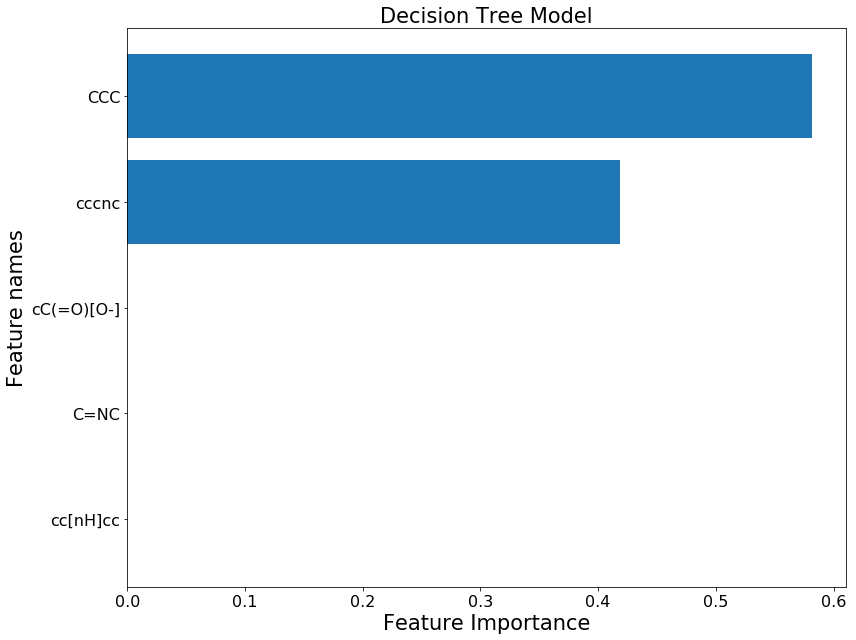

In [10]:
title=name_features
p = np.argsort(-clf.feature_importances_)
feat=[]
importance=[]
for i in range(len(name_features)):
    print('feature_name:', title[p[i]], 'importance: ', clf.feature_importances_[p[i]])
    feat.append(title[p[i]])
    importance.append(clf.feature_importances_[p[i]])
feat=np.array(feat)
importance=np.array(importance)
# Plot the feature importances of the forest
tree_feature_importances = importance
sorted_idx = tree_feature_importances.argsort()
y_ticks = np.arange(0, len(feat))

#设置输出的图片大小
figsize = 12,9
fig, ax = plt.subplots(figsize=figsize)

ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feat[sorted_idx])
ax.set_yticks(y_ticks)
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 21,}
ax.set_xlabel('Feature Importance',font1)
ax.set_ylabel('Feature names',font1)
ax.set_title("Decision Tree Model",font1)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 设置坐标标签字体大小
# ax.set_xlabel(..., fontsize=20)
# ax.set_ylabel(..., fontsize=20)
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=16)
fig.tight_layout()
plt.savefig(plot_tree_name_5, bbox_inches='tight',dpi=600)
plt.show()

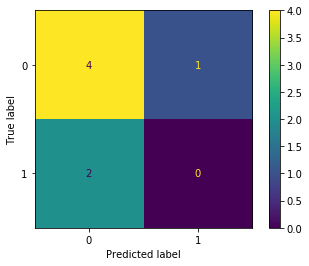

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_tree_name_3, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

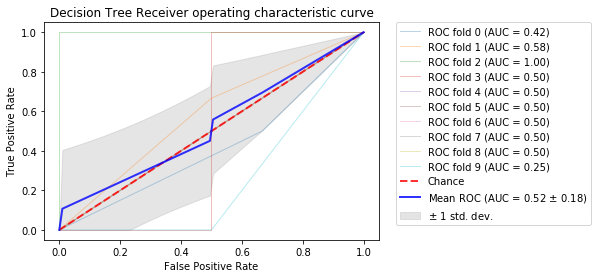

[0.2  0.6  0.5  0.75 0.5  0.5  0.5  0.5  0.5  0.5 ]


In [12]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
n_splits=10
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X[train], y[train])
    viz = plot_roc_curve(clf, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Decision Tree Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_tree_name_4, bbox_inches='tight',dpi=600)
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
print(scores)